**DATA ANALYST ASSIGNMENT**




Narenraj Vivekanandan

**Importing necessary packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

In [2]:
data=pd.read_excel('../input/analyst/Data Analyst Assignment (1).xlsx')
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [3]:
data.isna().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [4]:
data.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [5]:
for i in range(1,7):
    print(data[data.columns[i]].unique())

['Product 1']
['Performance']
['Google Ads' 'Facebook Ads']
['Search' 'Conversions']
['Search Keywords' 'Creative']
['Brand' 'Competitor' 'Generic' 'Facebook Ads']


Text(0.5, 1.0, 'link_clicks')

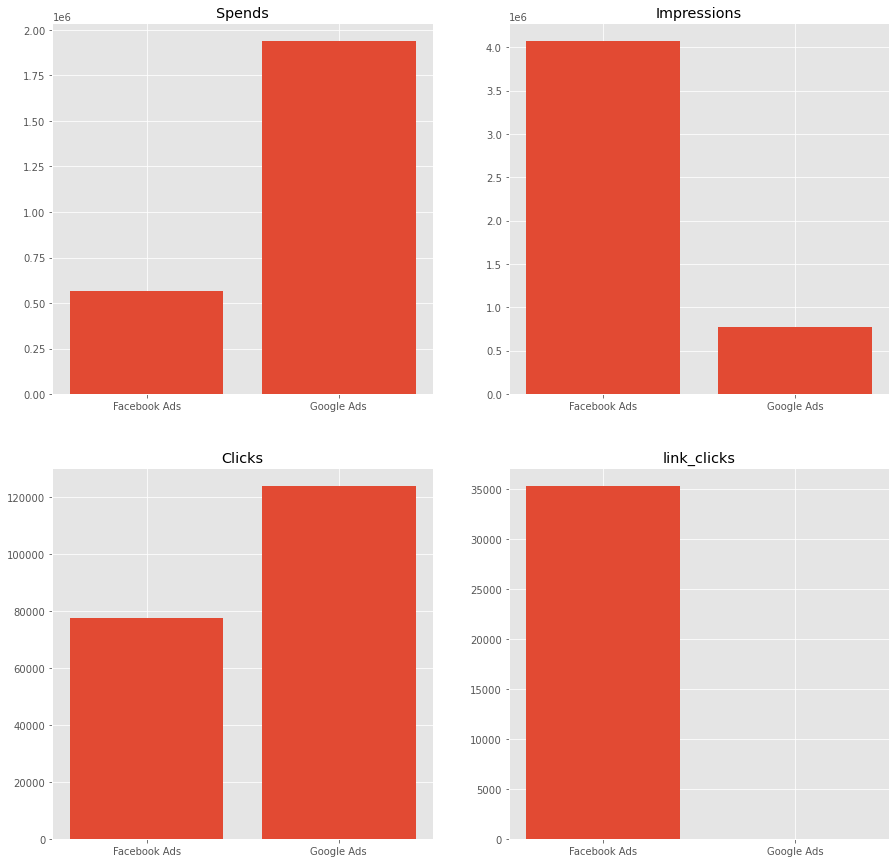

In [6]:

fig,a =  plt.subplots(2,2,figsize=(15,15))

a[0][0].bar(data.groupby('campaign_platform').sum().index,data.groupby('campaign_platform').sum()['spends'])
a[0][0].set_title('Spends')
a[0][1].bar(data.groupby('campaign_platform').sum().index,data.groupby('campaign_platform').sum()['impressions'])
a[0][1].set_title('Impressions')
a[1][0].bar(data.groupby('campaign_platform').sum().index,data.groupby('campaign_platform').sum()['clicks'])
a[1][0].set_title('Clicks')
a[1][1].bar(data.groupby('campaign_platform').sum().index,data.groupby('campaign_platform').sum()['link_clicks'])
a[1][1].set_title('link_clicks')
    

    

Text(0.5, 1.0, 'link_clicks')

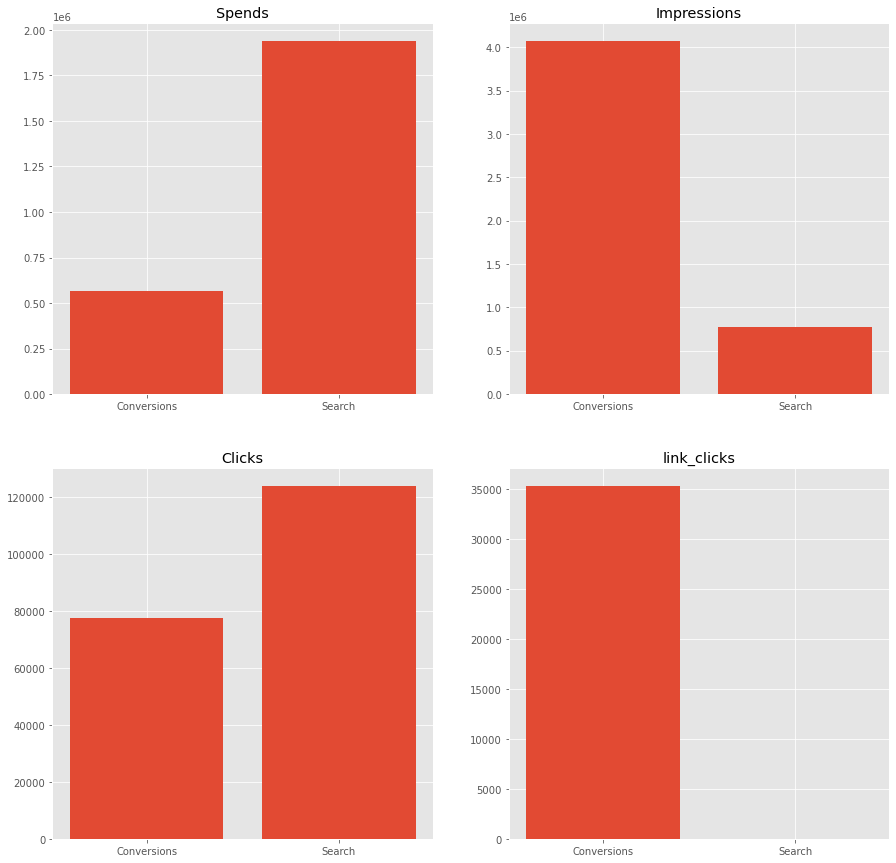

In [7]:

fig,a =  plt.subplots(2,2,figsize=(15,15))

a[0][0].bar(data.groupby('campaign_type').sum().index,data.groupby('campaign_type').sum()['spends'])
a[0][0].set_title('Spends')
a[0][1].bar(data.groupby('campaign_type').sum().index,data.groupby('campaign_type').sum()['impressions'])
a[0][1].set_title('Impressions')
a[1][0].bar(data.groupby('campaign_type').sum().index,data.groupby('campaign_type').sum()['clicks'])
a[1][0].set_title('Clicks')
a[1][1].bar(data.groupby('campaign_type').sum().index,data.groupby('campaign_type').sum()['link_clicks'])
a[1][1].set_title('link_clicks')
    

In [8]:
corrMat=data.corr()

In [9]:
corrMat

,spends,impressions,clicks,link_clicks
spends,1.000000,0.744552,0.838371,0.697201
impressions,0.744552,1.000000,0.917512,0.963108
clicks,0.838371,0.917512,1.000000,0.925588
link_clicks,0.697201,0.963108,0.925588,1.000000


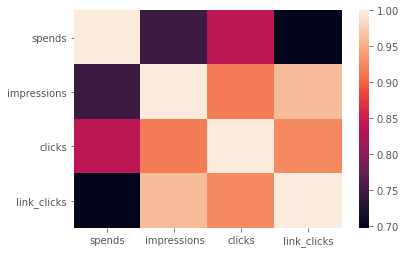

In [10]:
sns.heatmap(corrMat)
plt.show()

In [11]:
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [12]:
data['age'].unique()

array(['18-24', '25-34', '35-44', 'Undetermined', '45-54', '55-64',
       '65 or more'], dtype=object)

In [13]:
age_low=[]
age_high=[]
split=[]
for age in data['age']:
    if age=='Undetermined':
        age_low.append('0')
        age_high.append('0')
    elif age=='65 or more':
        age_low.append('65')
        age_high.append('100')
    else:    
        split=age.split('-')
        age_low.append(split[0])
        age_high.append(split[1])
    
        

In [14]:
data['age_low']=age_low
data['age_high']=age_high

In [15]:
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,age_low,age_high
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0,18,24
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0,25,34
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0,35,44
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0,0,0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0,18,24


In [16]:
data['total clicks']=data['clicks']+data['link_clicks']
data.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,age_low,age_high,total clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0,18,24,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0,25,34,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0,35,44,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0,0,0,3.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0,18,24,2.0


In [17]:
data[['age_low','age_high']]=data[['age_low','age_high']].astype(float)

In [18]:
data.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                    float64
age_low                        float64
age_high                       float64
total clicks                   float64
dtype: object

In [19]:
data['age_low']=data['age_low'].replace(0,data['age_low'].mean())
data['age_high']=data['age_high'].replace(0,data['age_high'].mean())

In [20]:
date_df=data.groupby('Date')
date_df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,age_low,age_high,total clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0,18.000000,24.000000,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0,25.000000,34.000000,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0,35.000000,44.000000,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0,31.635737,41.218962,3.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0,18.000000,24.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,18-24,27.83,55,15,0.0,18.000000,24.000000,15.0
16818,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,39.33,67,16,0.0,25.000000,34.000000,16.0
16819,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,10.21,14,5,0.0,35.000000,44.000000,5.0
16820,2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.28,6,1,0.0,45.000000,54.000000,1.0


In [21]:
data_date= data.groupby('Date').sum()['spends']
data_date

Date
2019-10-16      14.63
2019-10-18     913.45
2019-10-19     937.22
2019-10-20     540.89
2019-10-24    1150.45
               ...   
2020-07-03     474.25
2020-07-04     465.54
2020-07-05     477.80
2020-07-06     495.72
2020-07-07     149.20
Name: spends, Length: 257, dtype: float64

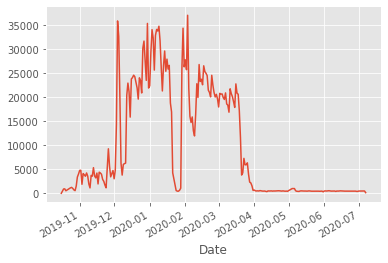

In [22]:
data_date.plot(kind='line')

In [23]:
data_refined=data[['campaign_platform','campaign_type','communication_medium','subchannel','age_low','age_high','spends','impressions','total clicks']]
data_final=pd.get_dummies(data_refined)
data_final.head()

,age_low,age_high,spends,impressions,total clicks,campaign_platform_Facebook Ads,campaign_platform_Google Ads,campaign_type_Conversions,campaign_type_Search,communication_medium_Creative,communication_medium_Search Keywords,subchannel_Brand,subchannel_Competitor,subchannel_Facebook Ads,subchannel_Generic
0,18.000000,24.000000,0.00,2,0.0,0,1,0,1,0,1,1,0,0,0
1,25.000000,34.000000,0.00,5,0.0,0,1,0,1,0,1,1,0,0,0
2,35.000000,44.000000,0.00,1,0.0,0,1,0,1,0,1,1,0,0,0
3,31.635737,41.218962,14.63,5,3.0,0,1,0,1,0,1,1,0,0,0
4,18.000000,24.000000,53.31,10,2.0,0,1,0,1,0,1,1,0,0,0


In [24]:
train=data_final.drop(['total clicks'], axis=1)
train.head()

,age_low,age_high,spends,impressions,campaign_platform_Facebook Ads,campaign_platform_Google Ads,campaign_type_Conversions,campaign_type_Search,communication_medium_Creative,communication_medium_Search Keywords,subchannel_Brand,subchannel_Competitor,subchannel_Facebook Ads,subchannel_Generic
0,18.000000,24.000000,0.00,2,0,1,0,1,0,1,1,0,0,0
1,25.000000,34.000000,0.00,5,0,1,0,1,0,1,1,0,0,0
2,35.000000,44.000000,0.00,1,0,1,0,1,0,1,1,0,0,0
3,31.635737,41.218962,14.63,5,0,1,0,1,0,1,1,0,0,0
4,18.000000,24.000000,53.31,10,0,1,0,1,0,1,1,0,0,0


In [25]:
target=data_final['total clicks']

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train = scaler.fit_transform(train)

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp=imp.fit(train)
train=imp.transform(train)

In [28]:
train.shape

(16834, 14)

In [29]:
target=target.values
target=target.reshape(-1,1)


In [30]:
imp=SimpleImputer()
#imp=imp.fit(y_train)
target=imp.fit_transform(target)

In [31]:
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

,R Square Score
Linear,0.920841
Ridge,0.920849
Bayesian Ridge,0.920849
Hubber,0.917706
Lasso,0.920849
Bagging,0.954042
RandomForest,0.955287
AdaBoost,0.915925
SVM RBF,0.215638
SVM Linear,0.916768


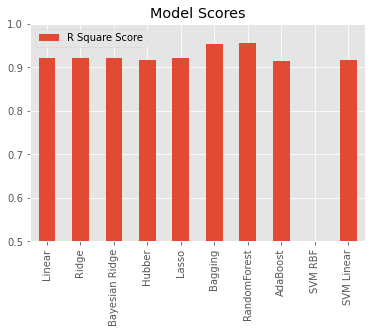

In [32]:
def lets_try(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

lets_try(train,target.ravel())

According to R square score, all the regressors perform fairly well except SVM RBF. However, the best regressor is RandomForest.